<a href="https://colab.research.google.com/github/SvetlanaErmakova/Analytics-and-statistics/blob/main/bicycles_in_London.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.	Загрузим данные, проверим число наблюдений и столбцов, наличие пропусков. Убедимся, что типы данных были прочитаны правильно. При необходимости – приведем переменные к нужным типам.
2.	Построем график по числу поездок по дате и времени.
3.	Преобразуем данные и посчитайте число поездок по дням. Визуализируйте результат.
4.	Используем агрегированные данные по дням и посчитаем скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.
5.	Посчитаем разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего. Далее – найдем стандартное отклонение.
6.	Определим границы 99% доверительного интервала, добавим данную информацию в датафрейм.
7.	Изучим аномально высокие значения и укажем день, когда число аренд было наибольшим. Найдем причину данной аномалии.
8.	Изучим аномально низкие значения, найдите день с наименьшим числом аренд. Найдем причину данной аномалии.




Описание данных:

•	timestamp – дата и время (точность до часа)

•	cnt – количество аренд велосипедов за этот час

•	t1 – температура, в С

•	t2 – температура "ощущается как", в С

•	hum – влажность (%)

•	wind_speed – скорость ветра, км/ч

•	weather_code – погодные условия:

1 – ясно (SKC)

2 – преимущественно ясно / встречаются отдельные облака (SCT)

3 – облачно / значительные облака (BKN)

4 – пасмурно (OVC)

7 – небольшой дождь Rain/ light Rain shower/ Light rain

10 – дождь с грозой

26 – снегопад

94 – ледяной туман

•	isholiday – является ли день праздником (1 – праздник, 0 – нет)

•	isweekend –  является ли день выходным (1 – выходной, 0 – нет)

•	season – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)


##1. Загрузим данные, проверим число наблюдений и столбцов, наличие пропусков. Убедимся, что типы данных были прочитаны правильно. При необходимости – приведем переменные к нужным типам.

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import iqr #межквартильный размах
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize': (12, 6)}, style = "whitegrid")

In [ ]:
df = pd.read_csv('london.csv', parse_dates = ['timestamp'])

In [ ]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [ ]:
df.shape

(17414, 10)

In [ ]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [ ]:
df.describe()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,2016-01-03 22:31:00.571953664,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
min,2015-01-04 00:00:00,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2015-07-04 20:15:00,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,2016-01-03 15:30:00,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,2016-07-04 15:45:00,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,2017-01-03 23:00:00,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000
std,NaN,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911


In [ ]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

##2. Построим график где по Ох - время, по Оу - число поездок (cnt)

<Axes: xlabel='timestamp', ylabel='cnt'>

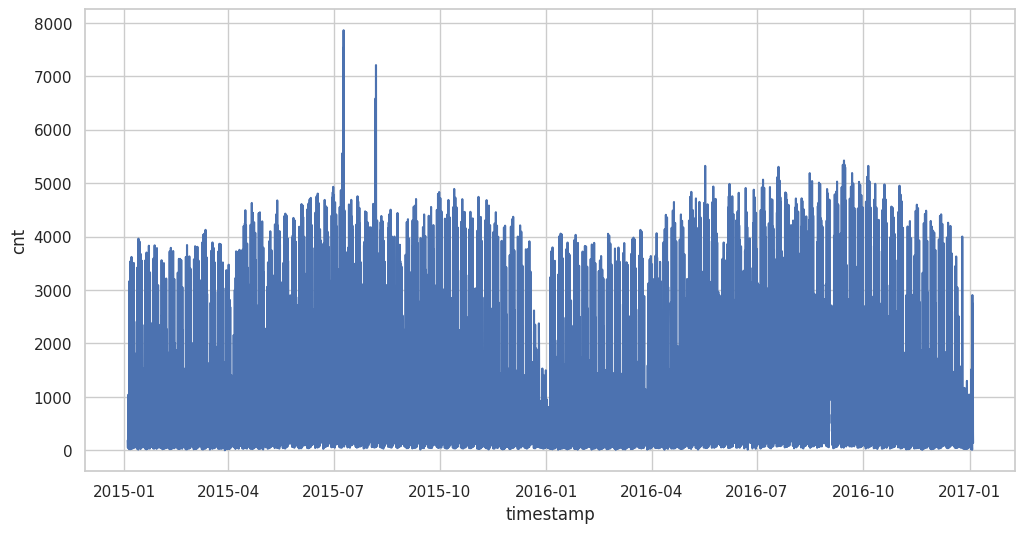

In [ ]:
sns.lineplot(x = "timestamp", y = "cnt", data = df)

##3. Преобразуем данные и посчитаем число поездок по дням. Визуализируем результат.

Применим метод .resample() - он помогает группировать по времени данные, которые изм-ся со временем. Можем группировать по часам, дням, годам, секундам и тд

In [ ]:
df.sort_values(by = "timestamp", inplace = True)
df.set_index('timestamp', drop = False, inplace = True) #для использования resample(),
#столбец с датами должен быть установлен в качестве индекса DataFrame
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


<Axes: xlabel='timestamp'>

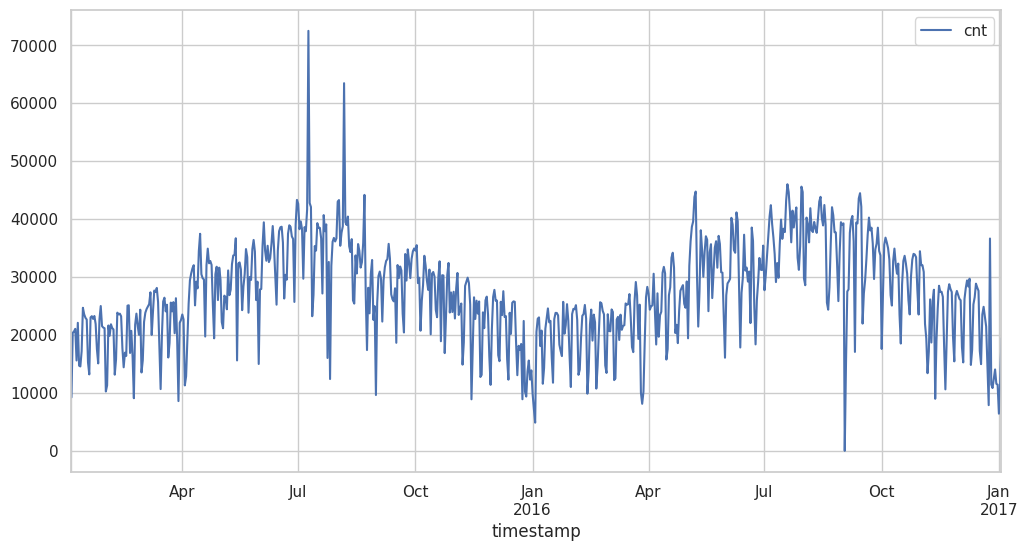

In [ ]:
df.resample('D').agg({'cnt':'sum'}).plot()

##4. Используем агрегированные данные по дням и посчитайте скользящее среднее с окном 3.

Выясним, что происходило в дни, когда на графике видны скачки и найдем причины аномалий!

In [ ]:
df_by_day = df.resample('D').cnt.sum().reset_index() #создадим отдельный датафрейм - агригир-ее данные по дням
df_by_day #для каждого дня сумма всех знач cnt

,timestamp,cnt
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
726,2016-12-30,11566
727,2016-12-31,11424
728,2017-01-01,6421
729,2017-01-02,11823


<Axes: >

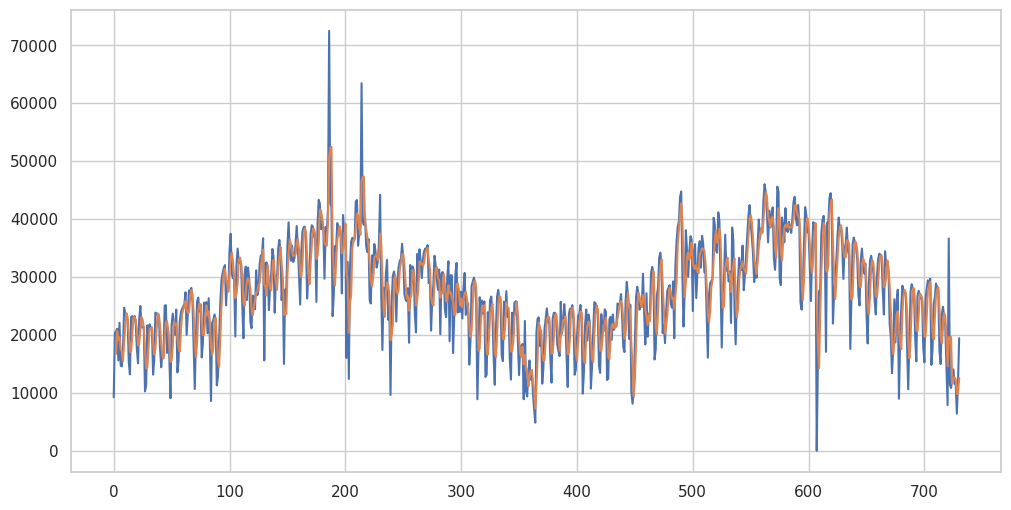

In [ ]:
df_by_day_roll = df.resample('D').cnt.sum().rolling(window = 3).mean().reset_index()
#посчитали скользящее среднее с окном 3, оно на 2 короче чем ориг данные
df_by_day.cnt.plot()
df_by_day_roll.cnt.plot()
#нарисовали графики в одних коор-х

In [ ]:
df_by_day_roll.query("timestamp=='2015-01-04'") #смотрим скользящее знач в нужный день

,timestamp,cnt
0,2015-01-04,NaN


##5. Посчитаем разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего. Далее – найдем стандартное отклонение.

Если реальные данные сильно отклоняются от скользящего среднего - это аномалии!
Чтобы понять что такое "сильно" - посчитаем 99% доверительный интервал

In [ ]:
#на столько в среднем отклон-ся реальные данные от скользящего среднего:
std = np.std(df_by_day['cnt'] - df_by_day_roll['cnt'])

round(np.std(df_by_day['cnt'] - df_by_day_roll['cnt']), 2)

4558.59

##6. Определим границы 99% доверительного интервала, добавим данную информацию в датафрейм.
Как раз посчитаем доверит интервал:
- сперва посчитаем верхнюю границу
- затем нижнюю
- добавим их как колонки в наш датасет

In [ ]:
upper_bound = df_by_day_roll.cnt + 2.576*std
lower_bound = df_by_day_roll.cnt - 2.576*std

df_by_day['upper_bound'] = upper_bound
df_by_day['lower_bound'] = lower_bound

##7. Изучим аномально высокие значения и укажите день, когда число аренд было наибольшим. Найдем причину данной аномалии.

Изучим в какие дни число аренд было выше, чем верхняя граница доверит интервала

In [ ]:
df_by_day[df_by_day.cnt > df_by_day.upper_bound]

,timestamp,cnt,upper_bound,lower_bound
186,2015-07-09,72504,62447.919188,38962.080812
214,2015-08-06,63468,58370.252521,34884.414146
609,2016-09-04,27512,26001.919188,2516.080812
721,2016-12-25,36653,31393.585854,7907.747479


максимум 7го числа объясняется тем, что в этот день были забастовки в метро

##8. Изучим аномально низкие значения, найдите день с наименьшим числом аренд. Найдем причину данной аномалии.

In [ ]:
df_by_day[df_by_day.cnt < df_by_day.lower_bound]

,timestamp,cnt,upper_bound,lower_bound
130,2015-05-14,15609,40452.252521,16966.414146
189,2015-07-12,23240,47779.585854,24293.747479
201,2015-07-24,16034,42756.585854,19270.747479
232,2015-08-24,17400,41272.252521,17786.414146
314,2015-11-14,8898,32780.252521,9294.414146
607,2016-09-02,0,37829.252521,14343.414146
615,2016-09-10,17080,43004.919188,19519.080812
621,2016-09-16,21967,47936.252521,24450.414146
678,2016-11-12,8990,32620.919188,9135.080812


Посмотрим на 2ое сентября в данных - обнаружим пропуск данных - те, вероятнее всего, это какая-то ошибка в результате кт данные не записывались